In [48]:
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import pylab as py 
import warnings
from scipy.stats import pearsonr,spearmanr

np.random.seed(seed=15)
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (12,12)

In [49]:
x = st.skewnorm.rvs(5, size=5000,loc=5)
y= st.skewnorm.rvs(-5, size=5000,loc=10)
z= st.skewnorm.rvs(8, size=5000,loc=30)

data=pd.DataFrame({"Revenue growth rate (annual %)": x, "Employment churn rate (annual %)": y,"Women employment rate (annual %)":z})


In [50]:
data.head()

,Revenue growth rate (annual %),Employment churn rate (annual %),Women employment rate (annual %)
0,4.862488,9.675271,30.810333
1,5.170068,9.909844,31.604785
2,5.293455,9.406219,31.693531
3,5.194323,9.596564,30.547744
4,5.134745,9.659086,30.494269


In [51]:
data.describe()

,Revenue growth rate (annual %),Employment churn rate (annual %),Women employment rate (annual %)
count,5000.000000,5000.000000,5000.000000
mean,5.789711,9.210817,30.809739
std,0.627095,0.619289,0.609186
min,4.560461,6.075596,29.633554
25%,5.312441,8.842873,30.337634
50%,5.682818,9.317639,30.704038
75%,6.161616,9.678909,31.160567
max,8.603847,10.550705,34.281479


<Axes: xlabel='Women employment rate (annual %)', ylabel='Count'>

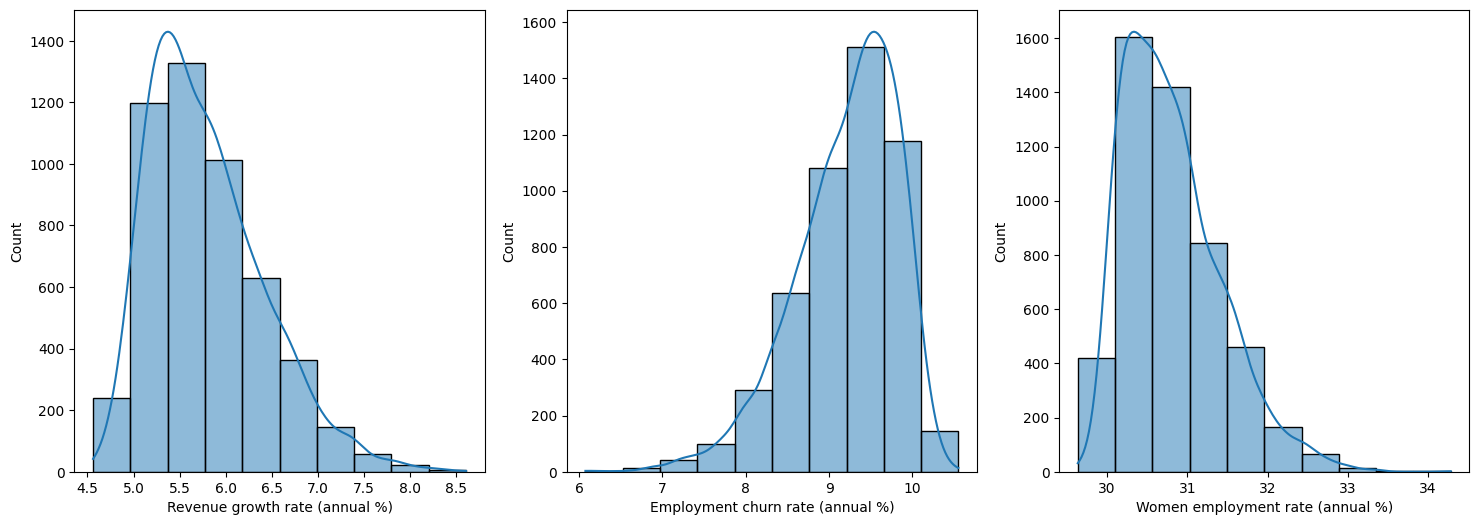

In [52]:
plt.rcParams["figure.figsize"] = (18,6)
fig, axs = plt.subplots(nrows=1, ncols=3)
sns.histplot(data["Revenue growth rate (annual %)"],kde=True, 
             bins=10,ax=axs[0])
sns.histplot(data["Employment churn rate (annual %)"], kde=True, 
             bins=10,ax=axs[1])
sns.histplot(data["Women employment rate (annual %)"], kde=True, 
             bins=10,ax=axs[2])

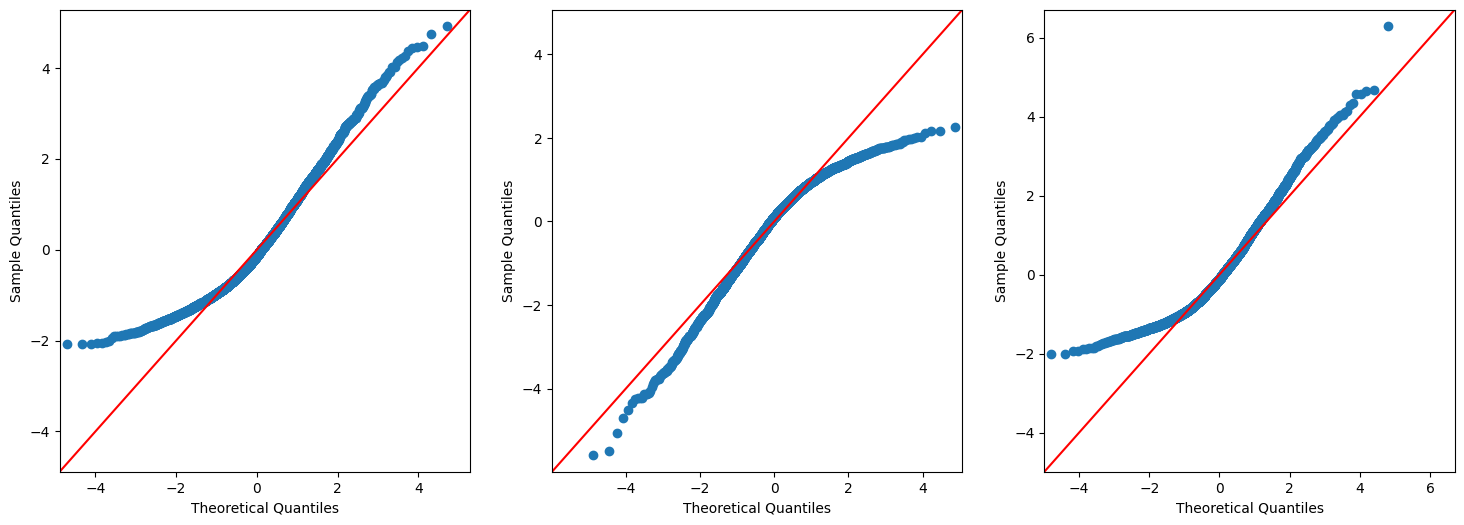

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=3)
sm.qqplot(data["Revenue growth rate (annual %)"], st.t, fit=True, line="45",ax=axs[0]) 
sm.qqplot(data["Employment churn rate (annual %)"], st.t, fit=True, line="45",ax=axs[1]) 
sm.qqplot(data["Women employment rate (annual %)"], st.t, fit=True, line="45",ax=axs[2]) 

py.show() 


In [54]:
plt.rcParams["figure.figsize"] = (12,6)


In [55]:
st.shapiro(data["Revenue growth rate (annual %)"])
print("P-value of Shapiro-Wilk Test of Revenue growth rate (annual %): ",st.shapiro(data["Revenue growth rate (annual %)"])[1])
print("P-value of Shapiro-Wilk Test of Employment churn rate (annual %): ",st.shapiro(data["Employment churn rate (annual %)"])[1])
print("P-value of Shapiro-Wilk Test of Women employment rate (annual %): ",st.shapiro(data["Women employment rate (annual %)"])[1])


P-value of Shapiro-Wilk Test of Revenue growth rate (annual %):  5.827331822530525e-37
P-value of Shapiro-Wilk Test of Employment churn rate (annual %):  2.4340964901884386e-36
P-value of Shapiro-Wilk Test of Women employment rate (annual %):  5.26427038020881e-39


Reciprocal Transformation

In [56]:
data[["recipRevenue growth rate (annual %)","recipEmployment churn rate (annual %)"]]=1/data[["Revenue growth rate (annual %)","Employment churn rate (annual %)"]]

[Text(0.5, 1.0, 'Plot of Transformed Revenue growth rate (annual %)(Reciprocal)'),
 Text(0.5, 0, 'Revenue growth rate (annual %)(Reciprocal)')]

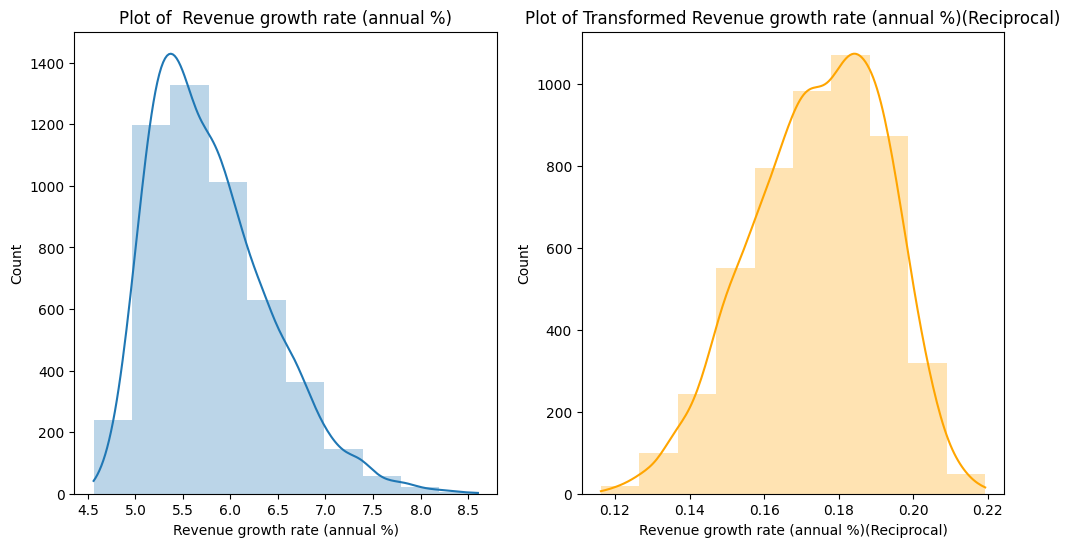

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["Revenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth rate (annual %)",xlabel="Revenue growth rate (annual %)")
sns.histplot(data["recipRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Revenue growth rate (annual %)(Reciprocal)",xlabel="Revenue growth rate (annual %)(Reciprocal)")

[Text(0.5, 1.0, 'Plot of Transformed Employment churn rate (annual %)(Reciprocal)'),
 Text(0.5, 0, 'Employment churn rate (annual %)(Reciprocal)')]

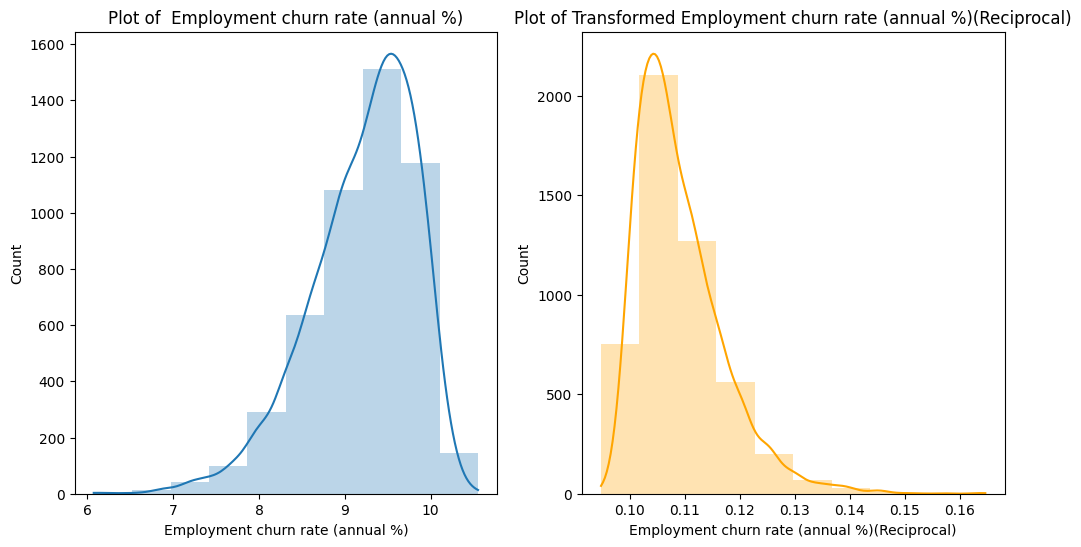

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["Employment churn rate (annual %)"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn rate (annual %)",xlabel="Employment churn rate (annual %)")
sns.histplot(data["recipEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Employment churn rate (annual %)(Reciprocal)",xlabel="Employment churn rate (annual %)(Reciprocal)")

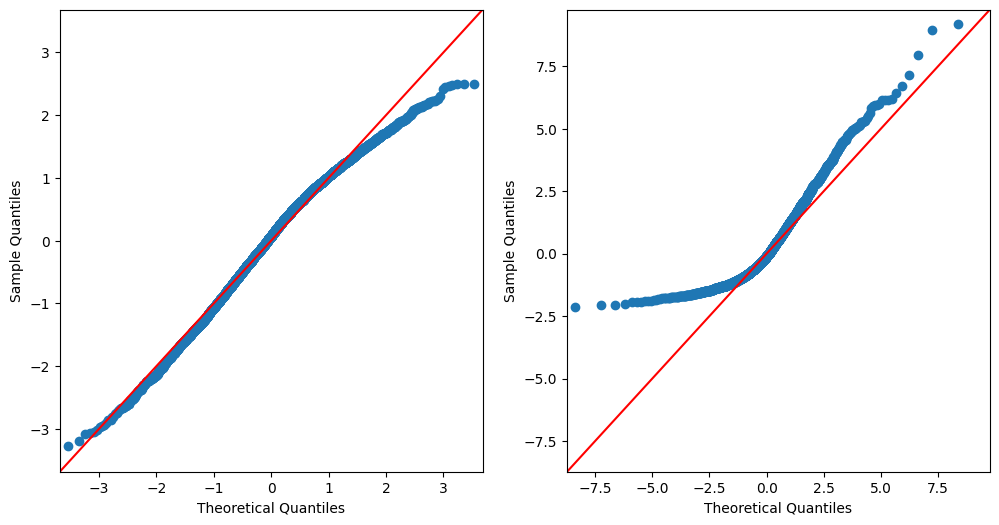

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sm.qqplot(data["recipRevenue growth rate (annual %)"], st.t, fit=True, line="45",ax=axs[0])
sm.qqplot(data["recipEmployment churn rate (annual %)"], st.t, fit=True, line="45",ax=axs[1])
py.show() 

In [60]:
print("P-value of Shapiro-Wilk Test of Revenue growth rate (annual %)(Reciprocal): ",st.shapiro(data["recipRevenue growth rate (annual %)"])[1])
print("P-value of Shapiro-Wilk Test of Employment churn rate (annual %)(Reciprocal): ",st.shapiro(data["recipEmployment churn rate (annual %)"])[1])

P-value of Shapiro-Wilk Test of Revenue growth rate (annual %)(Reciprocal):  1.8815717533248276e-19
P-value of Shapiro-Wilk Test of Employment churn rate (annual %)(Reciprocal):  1.0397386239189515e-47


MinMax  Scalling

In [61]:
norm=MinMaxScaler((0,1)).fit(data[["Revenue growth rate (annual %)","Employment churn rate (annual %)","Women employment rate (annual %)"]])
data[["MinMaxRevenue growth rate (annual %)","MinMaxEmployment churn rate (annual %)","MinMaxWomen employment rate (annual %)"]]=norm.transform(data[["Revenue growth rate (annual %)","Employment churn rate (annual %)","Women employment rate (annual %)"]])


[Text(0.5, 1.0, 'Plot of  Women employment rate (annual %)(MinMax)'),
 Text(0.5, 0, 'Women employment rate (annual %)(MinMax)')]

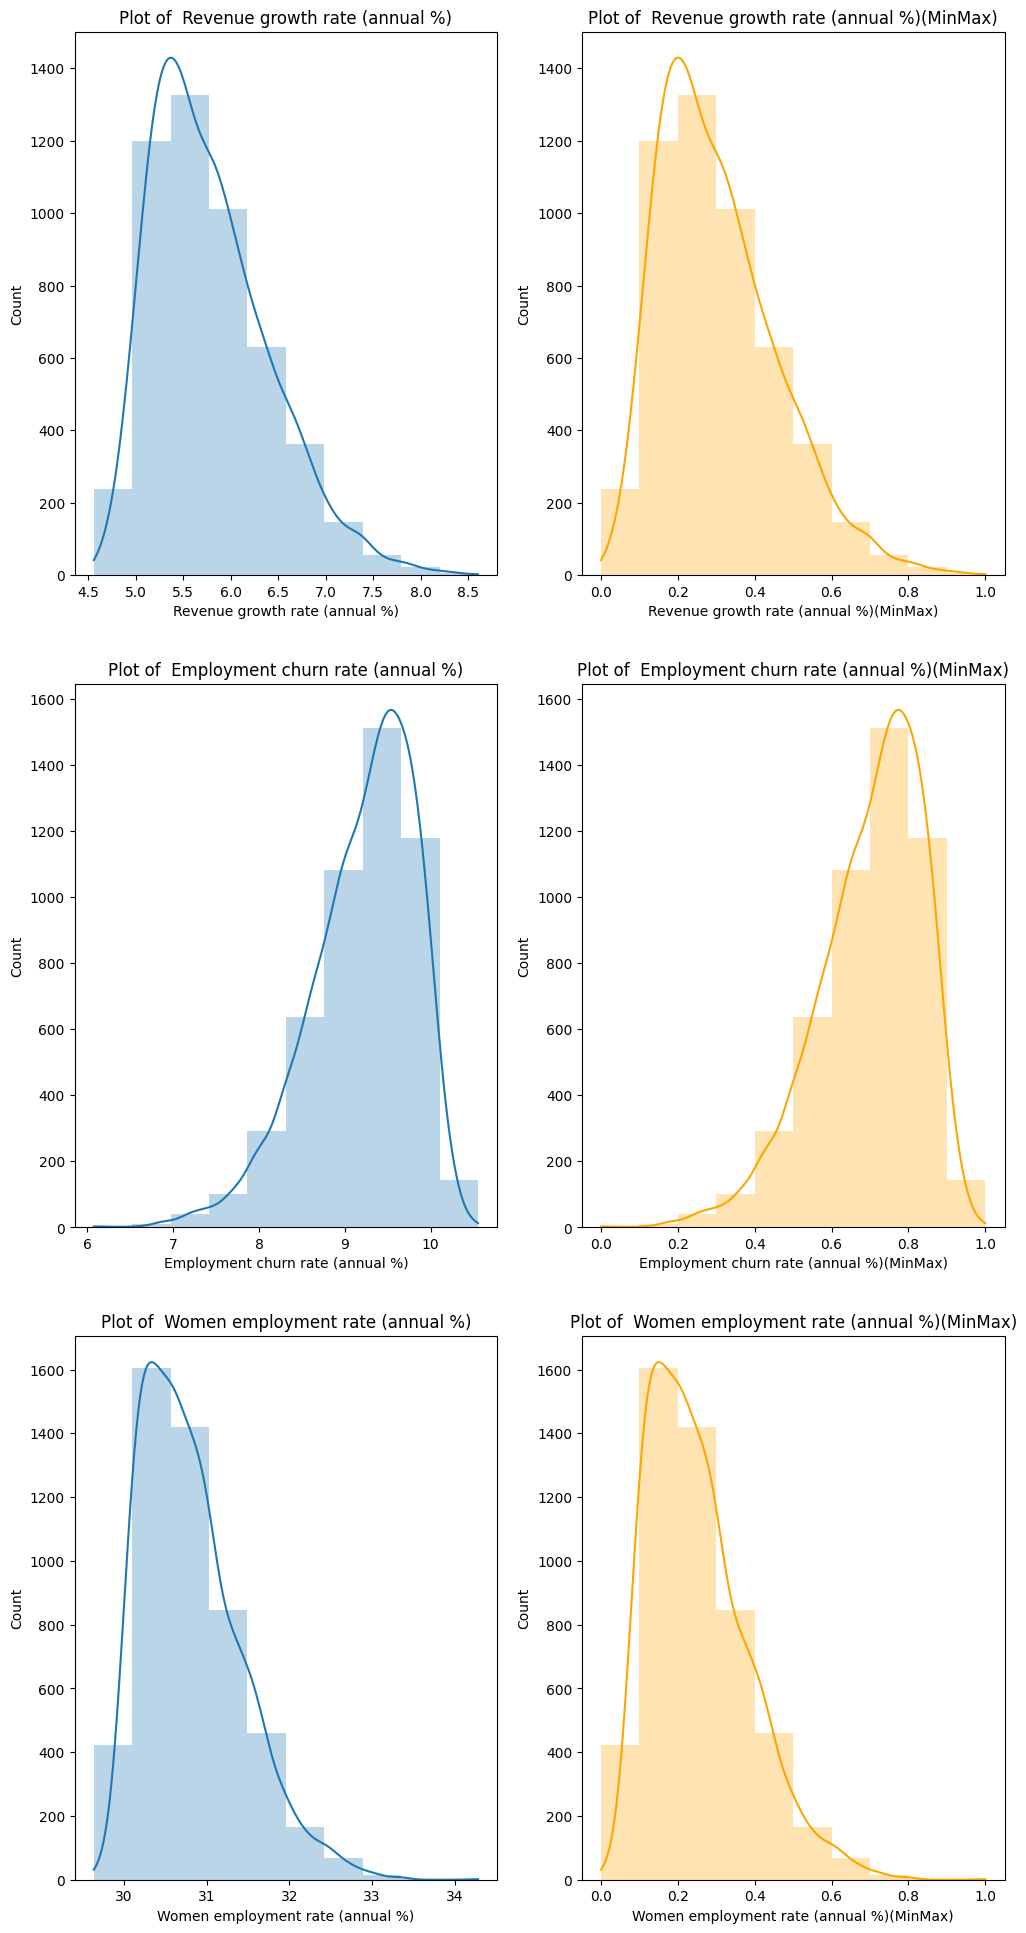

In [62]:
plt.rcParams["figure.figsize"] = (12,24)
fig, axs = plt.subplots(nrows=3, ncols=2)
sns.histplot(data["Revenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0,0],alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth rate (annual %)",xlabel="Revenue growth rate (annual %)")
sns.histplot(data["MinMaxRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth rate (annual %)(MinMax)",xlabel="Revenue growth rate (annual %)(MinMax)")
sns.histplot(data["Employment churn rate (annual %)"],bins=10,kde=True,ax=axs[1,0],alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn rate (annual %)",xlabel="Employment churn rate (annual %)")
sns.histplot(data["MinMaxEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[1,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn rate (annual %)(MinMax)",xlabel="Employment churn rate (annual %)(MinMax)")
sns.histplot(data["Women employment rate (annual %)"],bins=10,kde=True,ax=axs[2,0],alpha=0.3,edgecolor=None).set(title="Plot of  Women employment rate (annual %)",xlabel="Women employment rate (annual %)")
sns.histplot(data["MinMaxWomen employment rate (annual %)"],bins=10,kde=True,ax=axs[2,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of  Women employment rate (annual %)(MinMax)",xlabel="Women employment rate (annual %)(MinMax)")

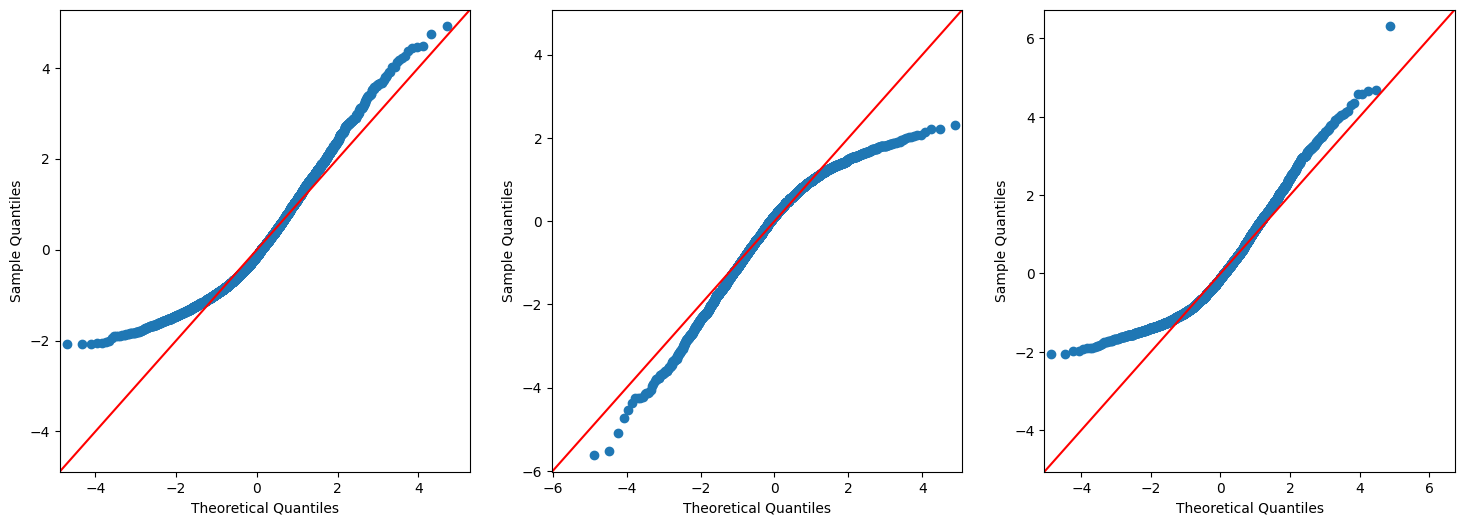

In [63]:
plt.rcParams["figure.figsize"] = (18,6)
fig, axs = plt.subplots(nrows=1, ncols=3)
sm.qqplot(data["MinMaxRevenue growth rate (annual %)"], st.t, fit=True, line="45",ax=axs[0])
sm.qqplot(data["MinMaxEmployment churn rate (annual %)"], st.t, fit=True, line="45",ax=axs[1])
sm.qqplot(data["MinMaxWomen employment rate (annual %)"], st.t, fit=True, line="45",ax=axs[2])
py.show() 

In [64]:
for i in ["MinMaxRevenue growth rate (annual %)","MinMaxEmployment churn rate (annual %)","MinMaxWomen employment rate (annual %)"]:
    if data[i].min() <=0:
        data["pos"+i]=data[i]+ 0.00001

In [65]:
print("P-value of Shapiro-Wilk Test of Revenue growth rate (annual %)(MinMax): ",st.shapiro(data["MinMaxRevenue growth rate (annual %)"])[1])
print("P-value of Shapiro-Wilk Test of Employment churn rate (annual %)(MinMax): ",st.shapiro(data["MinMaxEmployment churn rate (annual %)"])[1])
print("P-value of Shapiro-Wilk Test of Women employment rate (annual %)(MinMax): ",st.shapiro(data["MinMaxWomen employment rate (annual %)"])[1])

P-value of Shapiro-Wilk Test of Revenue growth rate (annual %)(MinMax):  5.827331822530857e-37
P-value of Shapiro-Wilk Test of Employment churn rate (annual %)(MinMax):  2.4340964901884386e-36
P-value of Shapiro-Wilk Test of Women employment rate (annual %)(MinMax):  5.264270380207606e-39


MinMax-SquareRoot Transformation

In [66]:
data[["squareRootMinMaxRevenue growth rate (annual %)","squareRootMinMaxEmployment churn rate (annual %)"]]=np.sqrt(data[["posMinMaxRevenue growth rate (annual %)","posMinMaxEmployment churn rate (annual %)"]])


[Text(0.5, 1.0, 'Plot of Transformed Revenue growth \n rate (annual %)(MinMax,Square Root)'),
 Text(0.5, 0, 'Revenue growth rate (annual %)(MinMax)')]

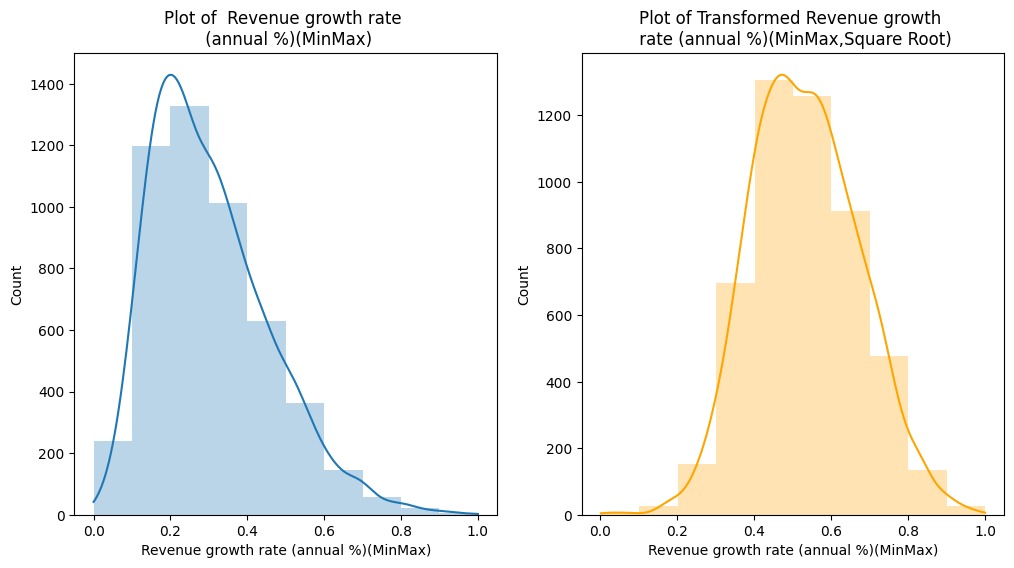

In [67]:
plt.rcParams["figure.figsize"] = (12,6)
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["posMinMaxRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth rate \n (annual %)(MinMax)",xlabel="Revenue growth rate (annual %)(MinMax)")
sns.histplot(data["squareRootMinMaxRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Revenue growth \n rate (annual %)(MinMax,Square Root)",xlabel="Revenue growth rate (annual %)(MinMax)")

[Text(0.5, 1.0, 'Plot of Transformed Employment churn \n rate (annual %)(MinMax,Square Root)'),
 Text(0.5, 0, 'Employment churn rate (annual %)(MinMax)')]

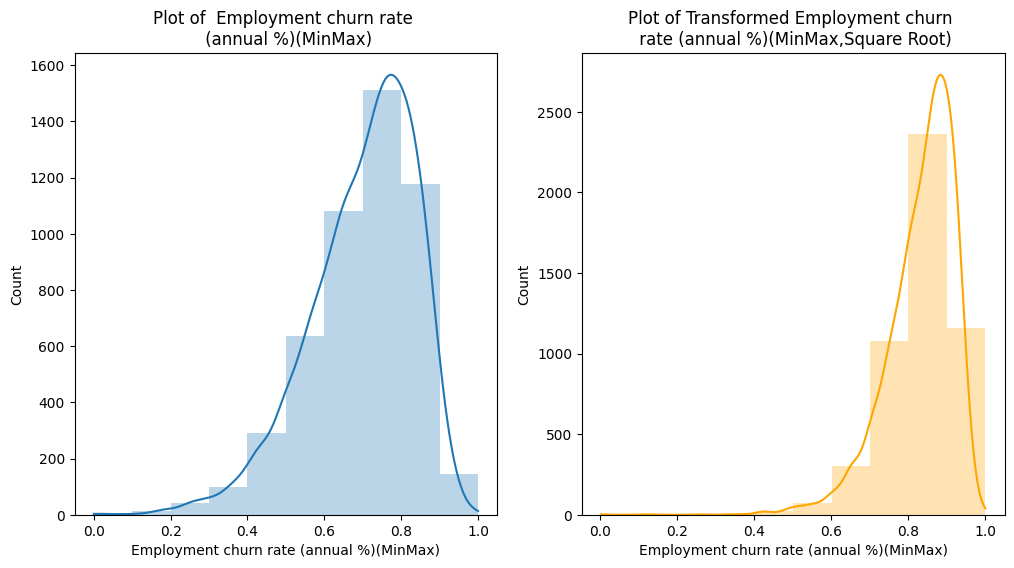

In [68]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["posMinMaxEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn rate \n (annual %)(MinMax)",xlabel="Employment churn rate (annual %)(MinMax)")
sns.histplot(data["squareRootMinMaxEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Employment churn \n rate (annual %)(MinMax,Square Root)",xlabel="Employment churn rate (annual %)(MinMax)")

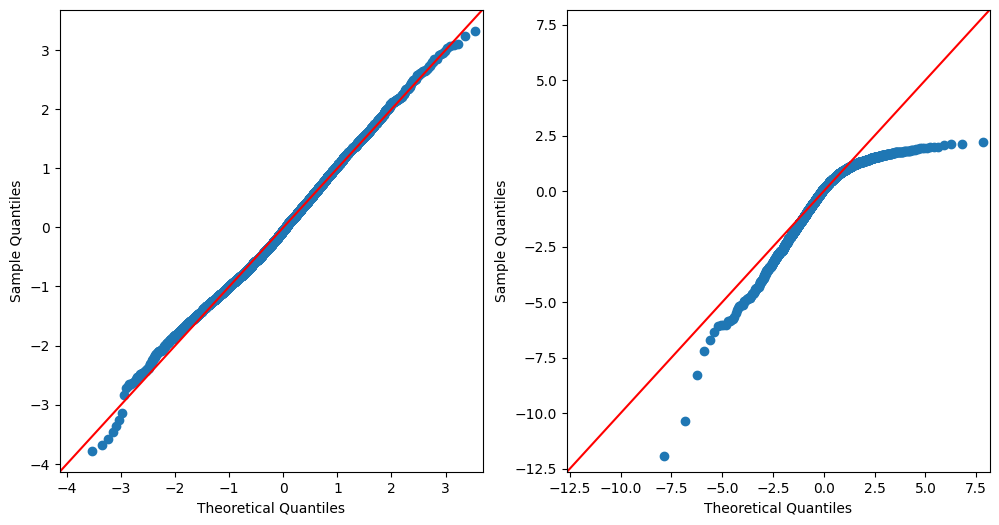

In [69]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sm.qqplot(data["squareRootMinMaxRevenue growth rate (annual %)"], st.t, fit=True, line="45",ax=axs[0])
sm.qqplot(data["squareRootMinMaxEmployment churn rate (annual %)"], st.t, fit=True, line="45",ax=axs[1])

py.show() 

In [70]:
print("P-value of Shapiro-Wilk Test of Revenue growth rate (annual %)(MinMax,Square Root): ",st.shapiro(data["squareRootMinMaxRevenue growth rate (annual %)"])[1])
print("P-value of Shapiro-Wilk Test of Employment churn rate (annual %)(MinMax,Square Root): ",st.shapiro(data["squareRootMinMaxEmployment churn rate (annual %)"])[1])

P-value of Shapiro-Wilk Test of Revenue growth rate (annual %)(MinMax,Square Root):  9.755727692798366e-10
P-value of Shapiro-Wilk Test of Employment churn rate (annual %)(MinMax,Square Root):  2.260884950425195e-47


Standard Scaling

In [71]:
norm=StandardScaler().fit(data[["Revenue growth rate (annual %)","Employment churn rate (annual %)","Women employment rate (annual %)"]])
data[["stdRevenue growth rate (annual %)","stdEmployment churn rate (annual %)","stdWomen employment rate (annual %)"]]=norm.transform(data[["Revenue growth rate (annual %)","Employment churn rate (annual %)","Women employment rate (annual %)"]])


[Text(0.5, 1.0, 'Plot of  Women employment rate (annual %)(Standard)'),
 Text(0.5, 0, 'Women employment rate (annual %)(Standard)')]

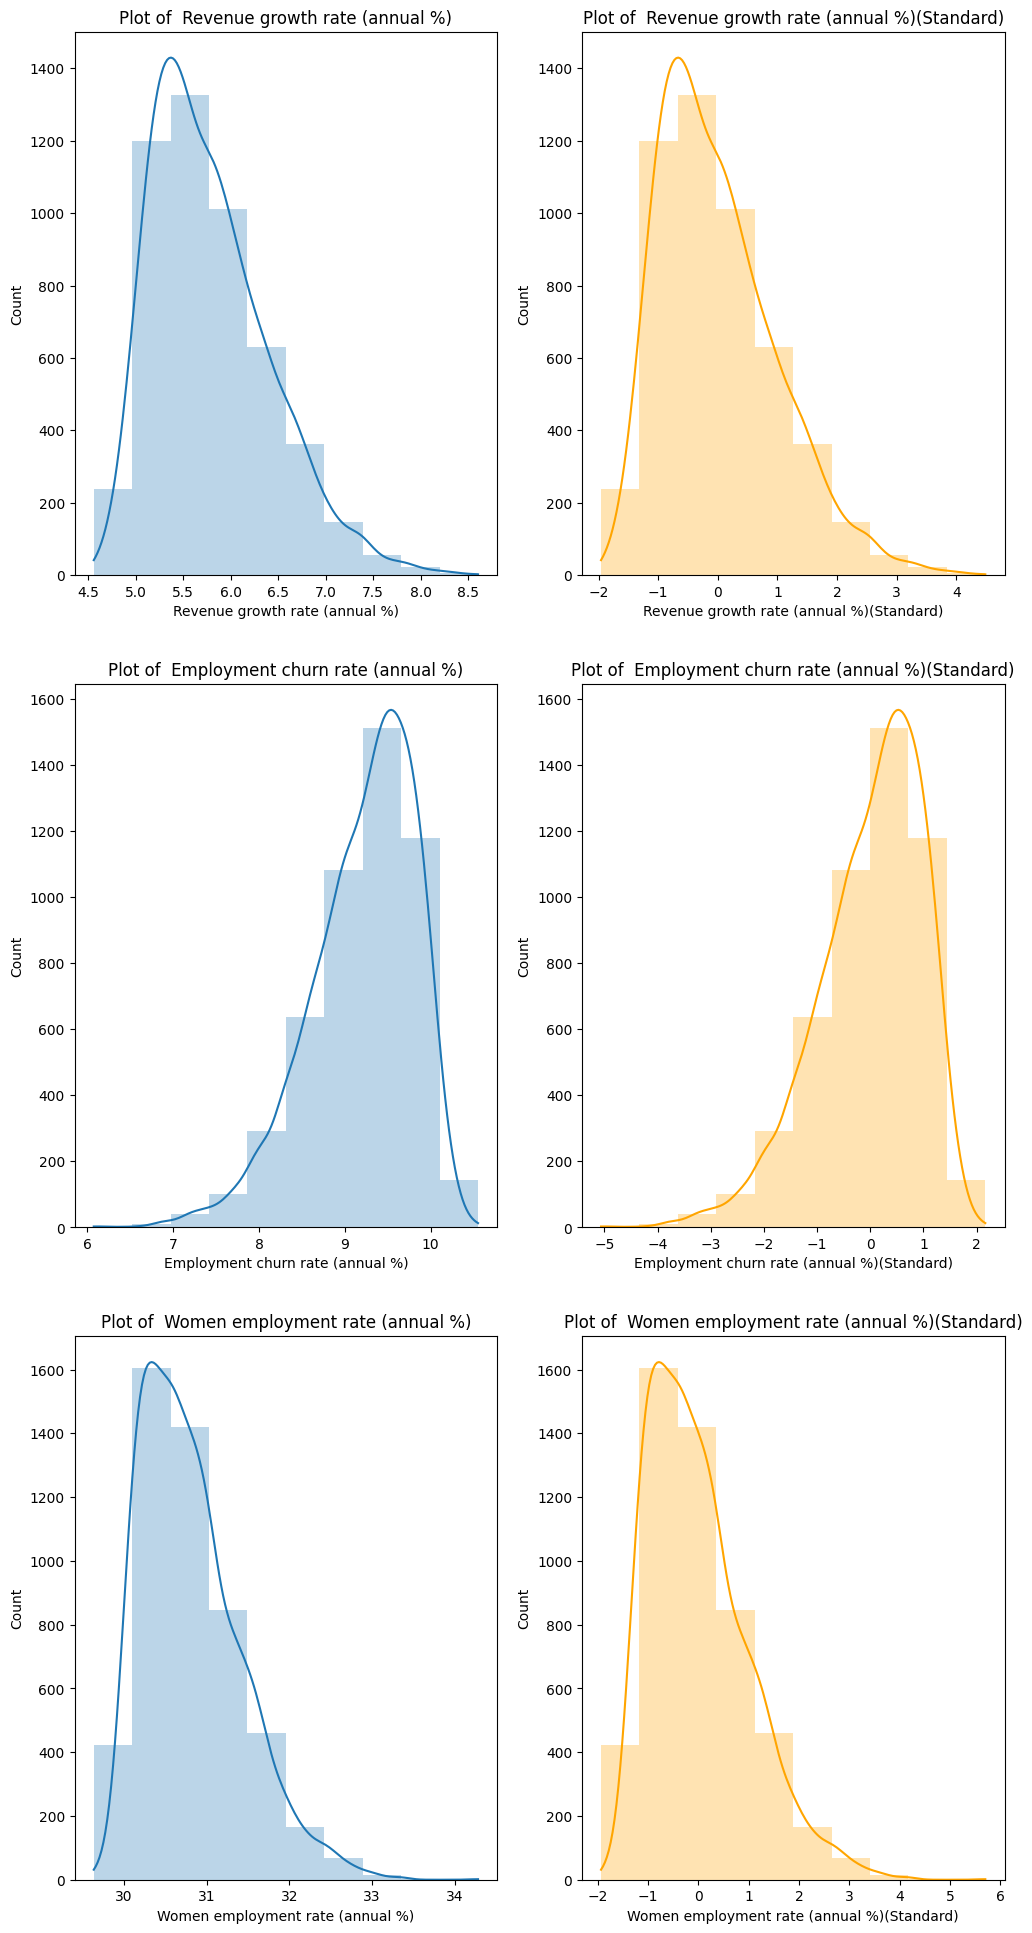

In [72]:
plt.rcParams["figure.figsize"] = (12,24)
fig, axs = plt.subplots(nrows=3, ncols=2)
sns.histplot(data["Revenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0,0],alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth rate (annual %)",xlabel="Revenue growth rate (annual %)")
sns.histplot(data["stdRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth rate (annual %)(Standard)",xlabel="Revenue growth rate (annual %)(Standard)")
sns.histplot(data["Employment churn rate (annual %)"],bins=10,kde=True,ax=axs[1,0],alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn rate (annual %)",xlabel="Employment churn rate (annual %)")
sns.histplot(data["stdEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[1,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn rate (annual %)(Standard)",xlabel="Employment churn rate (annual %)(Standard)")
sns.histplot(data["Women employment rate (annual %)"],bins=10,kde=True,ax=axs[2,0],alpha=0.3,edgecolor=None).set(title="Plot of  Women employment rate (annual %)",xlabel="Women employment rate (annual %)")
sns.histplot(data["stdWomen employment rate (annual %)"],bins=10,kde=True,ax=axs[2,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of  Women employment rate (annual %)(Standard)",xlabel="Women employment rate (annual %)(Standard)")

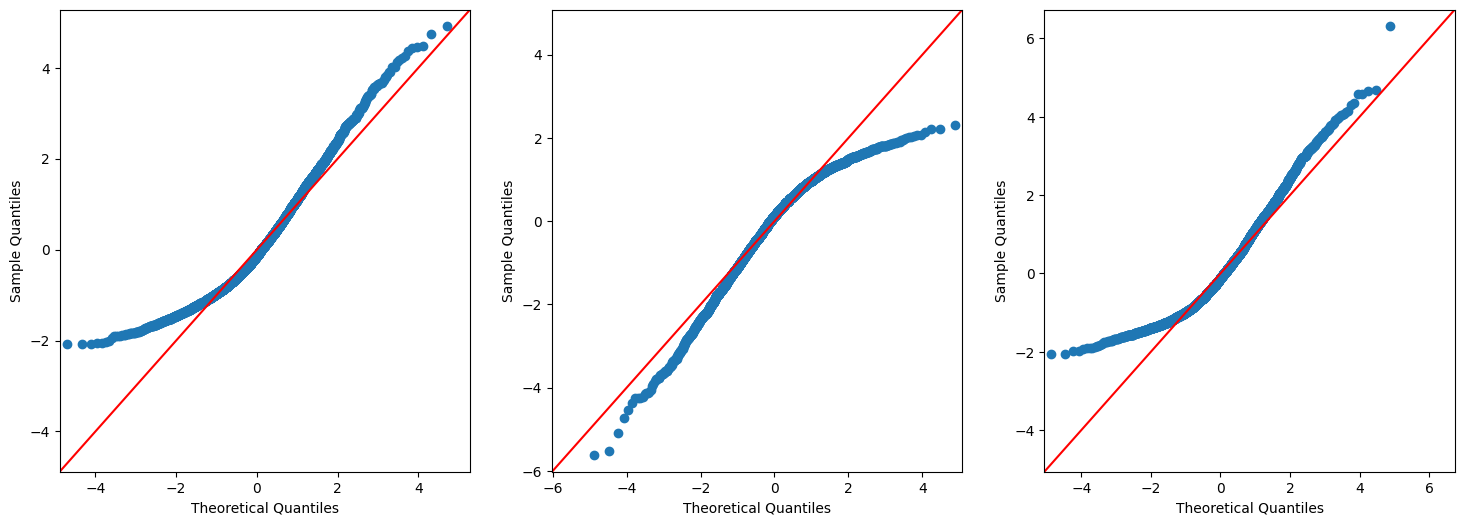

In [73]:
plt.rcParams["figure.figsize"] = (18,6)
fig, axs = plt.subplots(nrows=1, ncols=3)
sm.qqplot(data["stdRevenue growth rate (annual %)"], st.t, fit=True, line="45",ax=axs[0])
sm.qqplot(data["stdEmployment churn rate (annual %)"], st.t, fit=True, line="45",ax=axs[1])
sm.qqplot(data["stdWomen employment rate (annual %)"], st.t, fit=True, line="45",ax=axs[2])
py.show() 

In [74]:
for i in ["stdRevenue growth rate (annual %)","stdEmployment churn rate (annual %)","stdWomen employment rate (annual %)"]:
    if data[i].min() <=0:
        data["pos"+i]=data[i]+(abs(data[i].min()) + 0.00001)

In [75]:
print("P-value of Shapiro-Wilk Test of Revenue growth rate (annual %)(Standard): ",st.shapiro(data["stdRevenue growth rate (annual %)"])[1])
print("P-value of Shapiro-Wilk Test of Employment churn rate (annual %)(Standard): ",st.shapiro(data["stdEmployment churn rate (annual %)"])[1])
print("P-value of Shapiro-Wilk Test of Women employment rate (annual %)(Standard): ",st.shapiro(data["stdWomen employment rate (annual %)"])[1])

P-value of Shapiro-Wilk Test of Revenue growth rate (annual %)(Standard):  5.8273318225292745e-37
P-value of Shapiro-Wilk Test of Employment churn rate (annual %)(Standard):  2.4340964901891693e-36
P-value of Shapiro-Wilk Test of Women employment rate (annual %)(Standard):  5.26427038020881e-39


Standard-SquareRoot Transformation

In [76]:
data[["squareRootStdRevenue growth rate (annual %)","squareRootStdEmployment churn rate (annual %)"]]=np.sqrt(data[["posstdRevenue growth rate (annual %)","posstdEmployment churn rate (annual %)"]])


[Text(0.5, 1.0, 'Plot of Transformed Revenue \n growth rate (annual %)(Standard,Square Root)'),
 Text(0.5, 0, 'Revenue growth rate (annual %)(Standard)')]

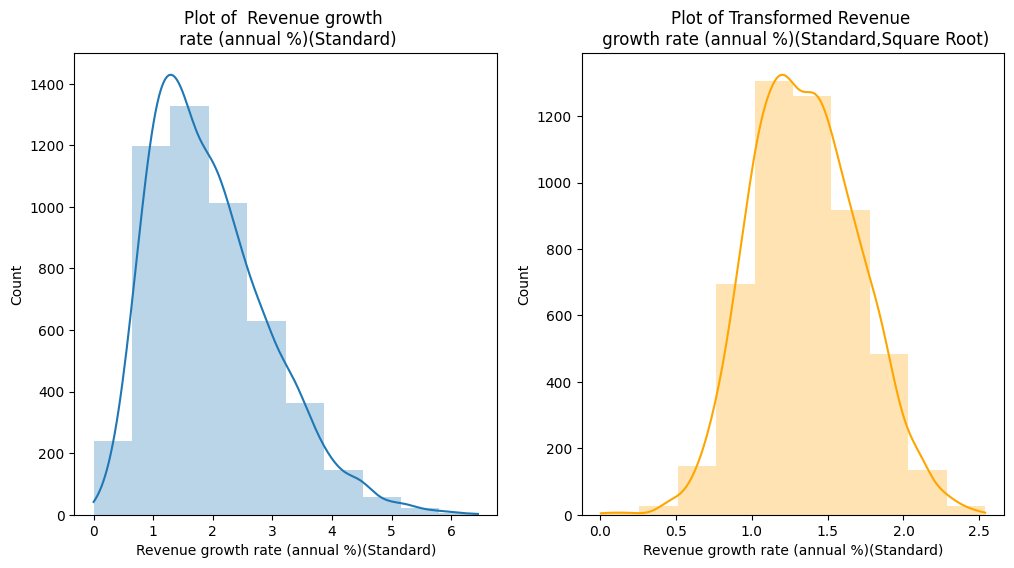

In [77]:
plt.rcParams["figure.figsize"] = (12,6)
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["posstdRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth \n rate (annual %)(Standard)",xlabel="Revenue growth rate (annual %)(Standard)")
sns.histplot(data["squareRootStdRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Revenue \n growth rate (annual %)(Standard,Square Root)",xlabel="Revenue growth rate (annual %)(Standard)")

[Text(0.5, 1.0, 'Plot of Transformed Employment churn \n rate (annual %)(Standard,Square Root)'),
 Text(0.5, 0, 'Employment churn rate (annual %)(Standard)')]

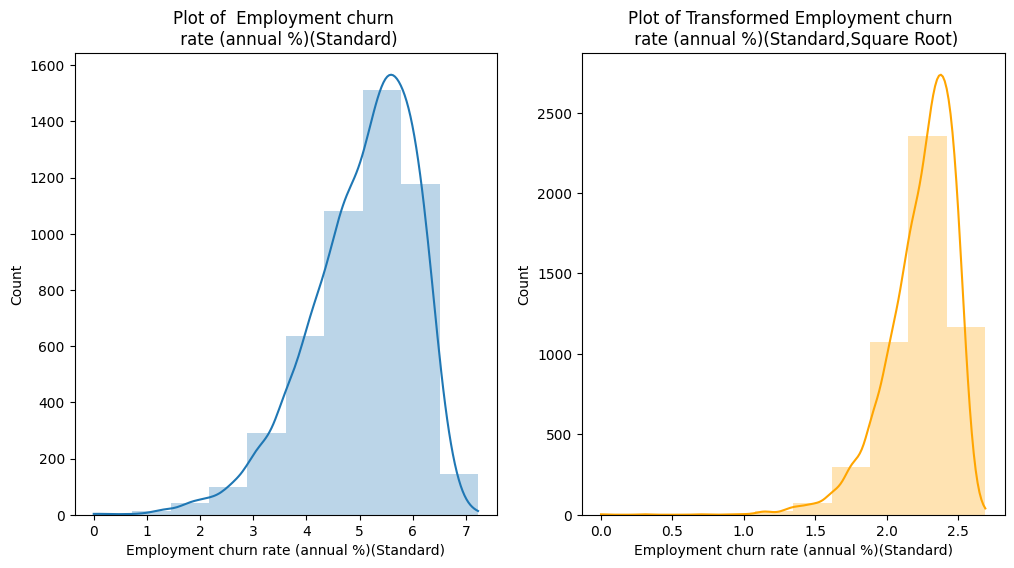

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(data["posstdEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[0],alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn \n rate (annual %)(Standard)",xlabel="Employment churn rate (annual %)(Standard)")
sns.histplot(data["squareRootStdEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Employment churn \n rate (annual %)(Standard,Square Root)",xlabel="Employment churn rate (annual %)(Standard)")

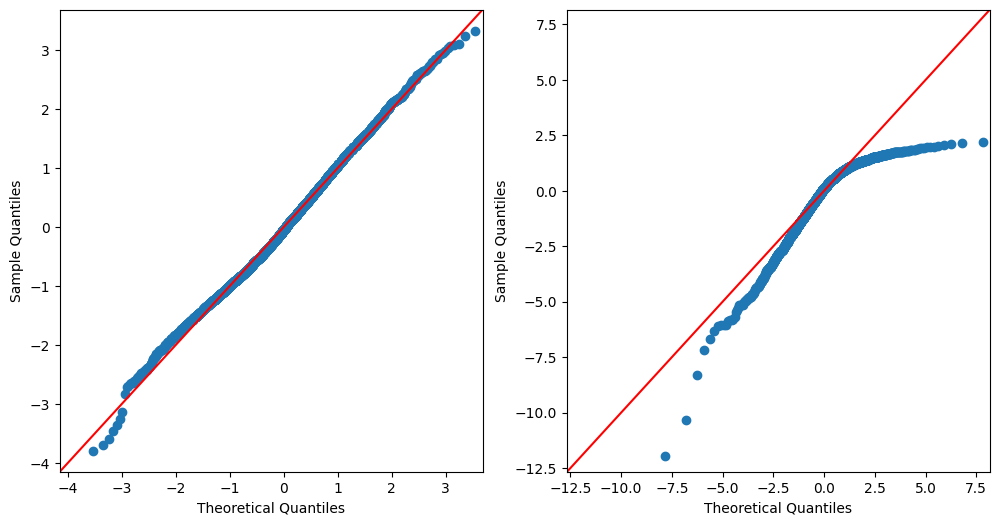

In [79]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sm.qqplot(data["squareRootStdRevenue growth rate (annual %)"], st.t, fit=True, line="45",ax=axs[0])
sm.qqplot(data["squareRootStdEmployment churn rate (annual %)"], st.t, fit=True, line="45",ax=axs[1])

py.show() 

In [80]:
print("P-value of Shapiro-Wilk Test of Revenue growth rate (annual %)(Standard,Square Root): ",st.shapiro(data["squareRootStdRevenue growth rate (annual %)"])[1])
print("P-value of Shapiro-Wilk Test of Employment churn rate (annual %)(Standard,Square Root): ",st.shapiro(data["squareRootStdEmployment churn rate (annual %)"])[1])

P-value of Shapiro-Wilk Test of Revenue growth rate (annual %)(Standard,Square Root):  9.792043286054348e-10
P-value of Shapiro-Wilk Test of Employment churn rate (annual %)(Standard,Square Root):  2.2199310994339815e-47


Summary & test

In [81]:
data.describe()

,Revenue growth rate (annual %),Employment churn rate (annual %),Women employment rate (annual %),recipRevenue growth rate (annual %),recipEmployment churn rate (annual %),MinMaxRevenue growth rate (annual %),MinMaxEmployment churn rate (annual %),MinMaxWomen employment rate (annual %),posMinMaxRevenue growth rate (annual %),posMinMaxEmployment churn rate (annual %),...,squareRootMinMaxRevenue growth rate (annual %),squareRootMinMaxEmployment churn rate (annual %),stdRevenue growth rate (annual %),stdEmployment churn rate (annual %),stdWomen employment rate (annual %),posstdRevenue growth rate (annual %),posstdEmployment churn rate (annual %),posstdWomen employment rate (annual %),squareRootStdRevenue growth rate (annual %),squareRootStdEmployment churn rate (annual %)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.789711,9.210817,30.809739,0.174632,0.109097,0.304015,0.700591,0.253056,0.304025,0.700601,...,0.533246,0.832219,-1.143974e-16,-9.720225e-16,4.373391e-15,1.960435,5.063134,1.930951,1.354091,2.237236
std,0.627095,0.619289,0.609186,0.017821,0.007919,0.155092,0.138385,0.131066,0.155092,0.138385,...,0.140276,0.089521,1.000100e+00,1.000100e+00,1.000100e+00,1.000100,1.000100,1.000100,0.356226,0.240671
min,4.560461,6.075596,29.633554,0.116227,0.094780,0.000000,0.000000,0.000000,0.000010,0.000010,...,0.003162,0.003162,-1.960425e+00,-5.063124e+00,-1.930941e+00,0.000010,0.000010,0.000010,0.003162,0.003162
25%,5.312441,8.842873,30.337634,0.162295,0.103317,0.185978,0.618371,0.151483,0.185988,0.618381,...,0.431263,0.786372,-7.611559e-01,-5.941985e-01,-7.750540e-01,1.199279,4.468936,1.155897,1.095116,2.113986
50%,5.682818,9.317639,30.704038,0.175969,0.107323,0.277579,0.724461,0.230314,0.277589,0.724471,...,0.526867,0.851159,-1.704734e-01,1.725091e-01,-1.735287e-01,1.789961,5.235643,1.757422,1.337894,2.288153
75%,6.161616,9.678909,31.160567,0.188237,0.113085,0.395994,0.805190,0.328536,0.396004,0.805200,...,0.629288,0.897329,5.931202e-01,7.559300e-01,5.759536e-01,2.553555,5.819064,2.506905,1.597985,2.412274
max,8.603847,10.550705,34.281479,0.219276,0.164593,1.000000,1.000000,1.000000,1.000010,1.000010,...,1.000005,1.000005,4.488026e+00,2.163809e+00,5.699551e+00,6.448461,7.226943,7.630502,2.539382,2.688297


Plots for Revenue growth rate (annual %)

[Text(0.5, 1.0, 'Plot of Transformed Revenue growth \n rate (annual %)(Standard,Square Root)'),
 Text(0.5, 0, 'Revenue growth rate (annual %)(Standard)')]

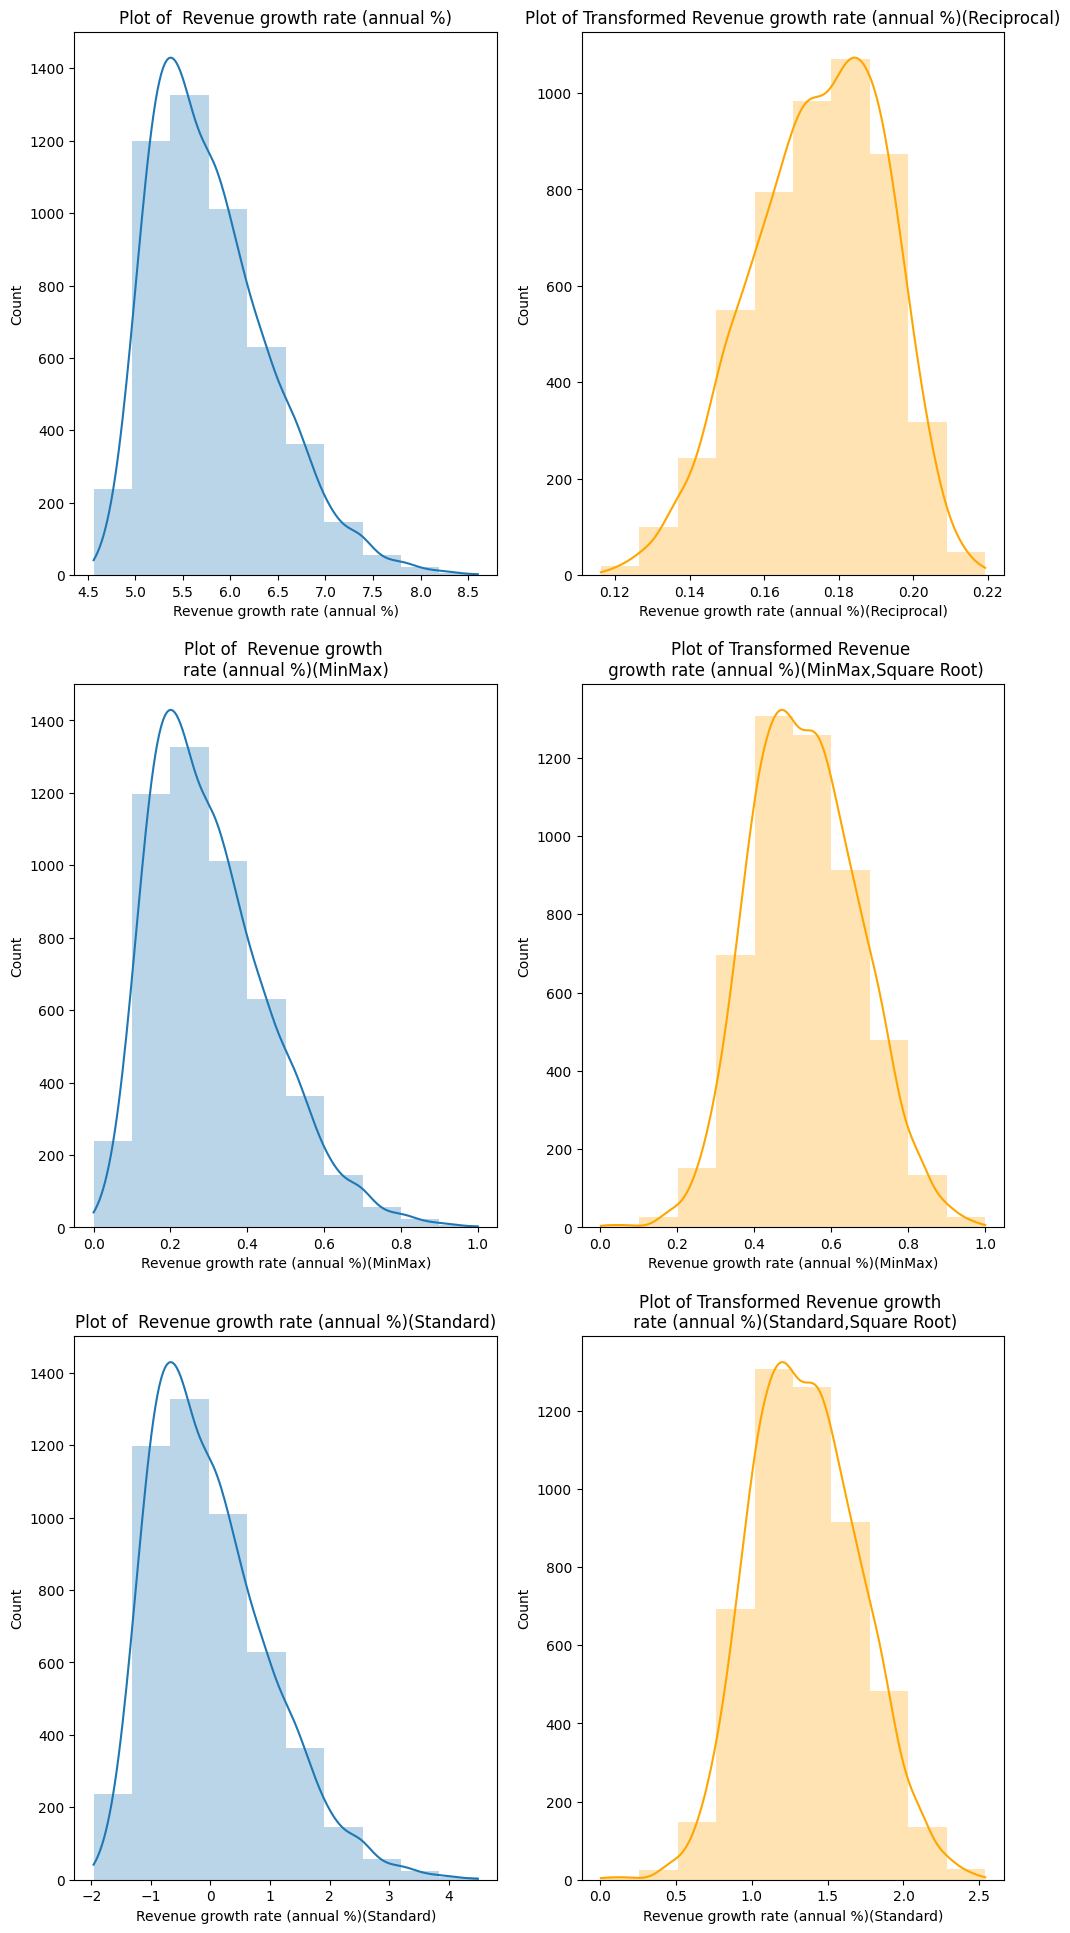

In [82]:
plt.rcParams["figure.figsize"] = (12,24)
fig, axs = plt.subplots(nrows=3, ncols=2)
sns.histplot(data["Revenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0,0],alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth rate (annual %)",xlabel="Revenue growth rate (annual %)")
sns.histplot(data["recipRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Revenue growth rate (annual %)(Reciprocal)",xlabel="Revenue growth rate (annual %)(Reciprocal)")
sns.histplot(data["MinMaxRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[1,0],alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth \nrate (annual %)(MinMax)",xlabel="Revenue growth rate (annual %)(MinMax)")
sns.histplot(data["squareRootMinMaxRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[1,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Revenue \n growth rate (annual %)(MinMax,Square Root)",xlabel="Revenue growth rate (annual %)(MinMax)")
sns.histplot(data["stdRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[2,0],alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth rate (annual %)(Standard)",xlabel="Revenue growth rate (annual %)(Standard)")
sns.histplot(data["squareRootStdRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[2,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Revenue growth \n rate (annual %)(Standard,Square Root)",xlabel="Revenue growth rate (annual %)(Standard)")

[Text(0.5, 1.0, 'Plot of Transformed Revenue growth \n rate (annual %)(Standard,Square Root)'),
 Text(0.5, 0, 'Revenue growth rate (annual %)(Standard)')]

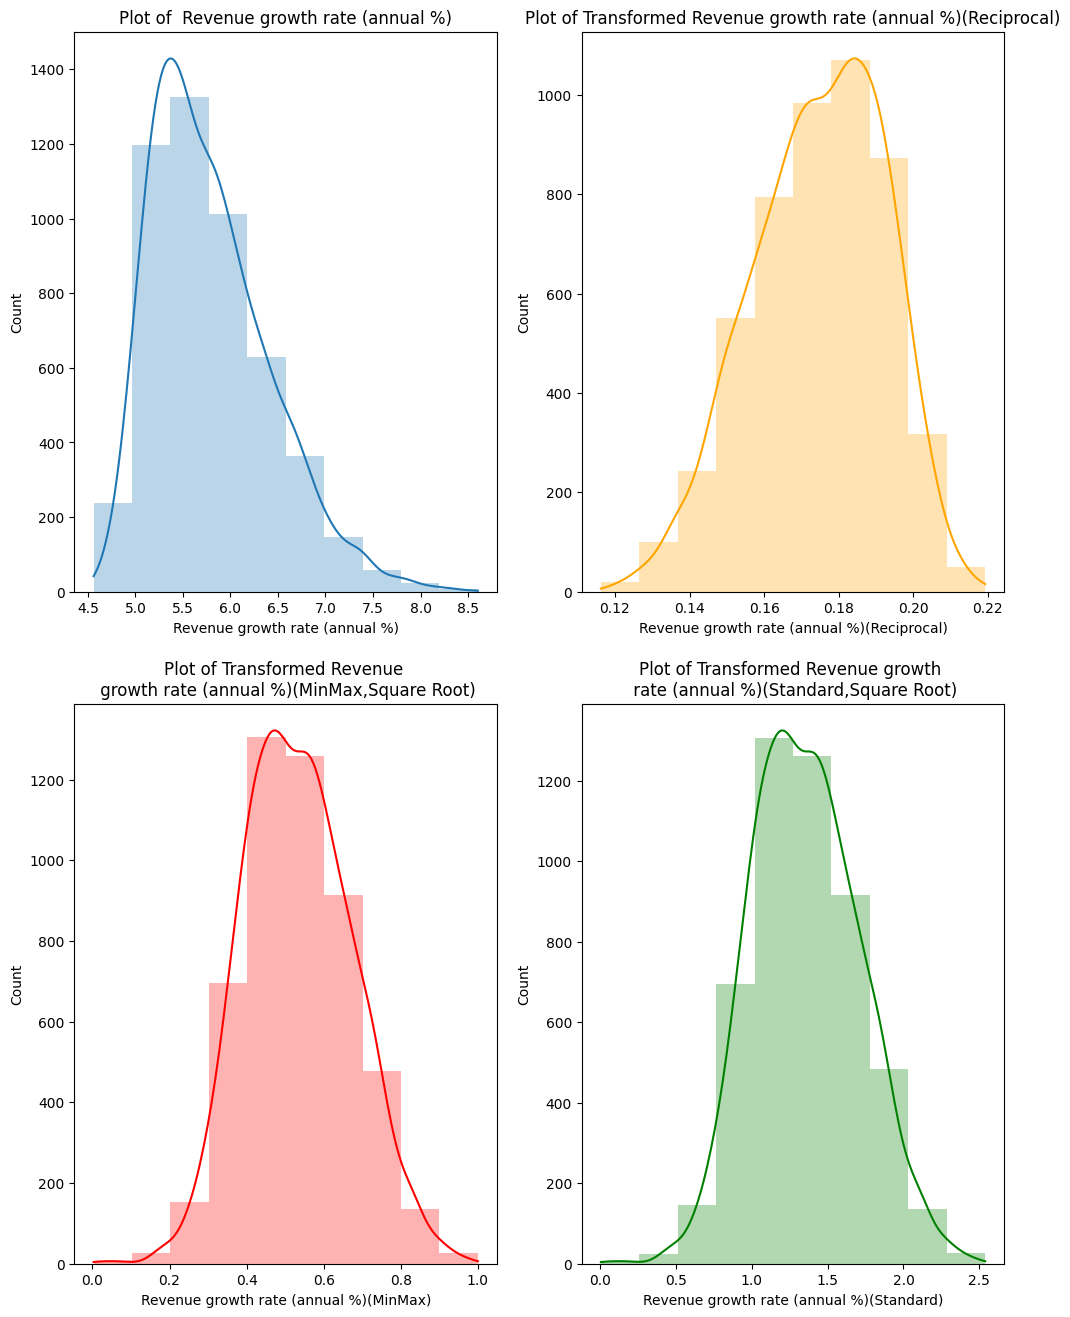

In [83]:
plt.rcParams["figure.figsize"] = (12,16)
fig, axs = plt.subplots(nrows=2, ncols=2)
sns.histplot(data["Revenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0,0],alpha=0.3,edgecolor=None).set(title="Plot of  Revenue growth rate (annual %)",xlabel="Revenue growth rate (annual %)")
sns.histplot(data["recipRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[0,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Revenue growth rate (annual %)(Reciprocal)",xlabel="Revenue growth rate (annual %)(Reciprocal)")
sns.histplot(data["squareRootMinMaxRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[1,0],color="red",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Revenue \n growth rate (annual %)(MinMax,Square Root)",xlabel="Revenue growth rate (annual %)(MinMax)")
sns.histplot(data["squareRootStdRevenue growth rate (annual %)"],bins=10,kde=True,ax=axs[1,1],color="green",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Revenue growth \n rate (annual %)(Standard,Square Root)",xlabel="Revenue growth rate (annual %)(Standard)")

Plots for Employment churn rate (annual %)

[Text(0.5, 1.0, 'Plot of Transformed Employment churn \n rate (annual %)(Standard,Square Root)'),
 Text(0.5, 0, 'Employment churn rate (annual %)(Standard)')]

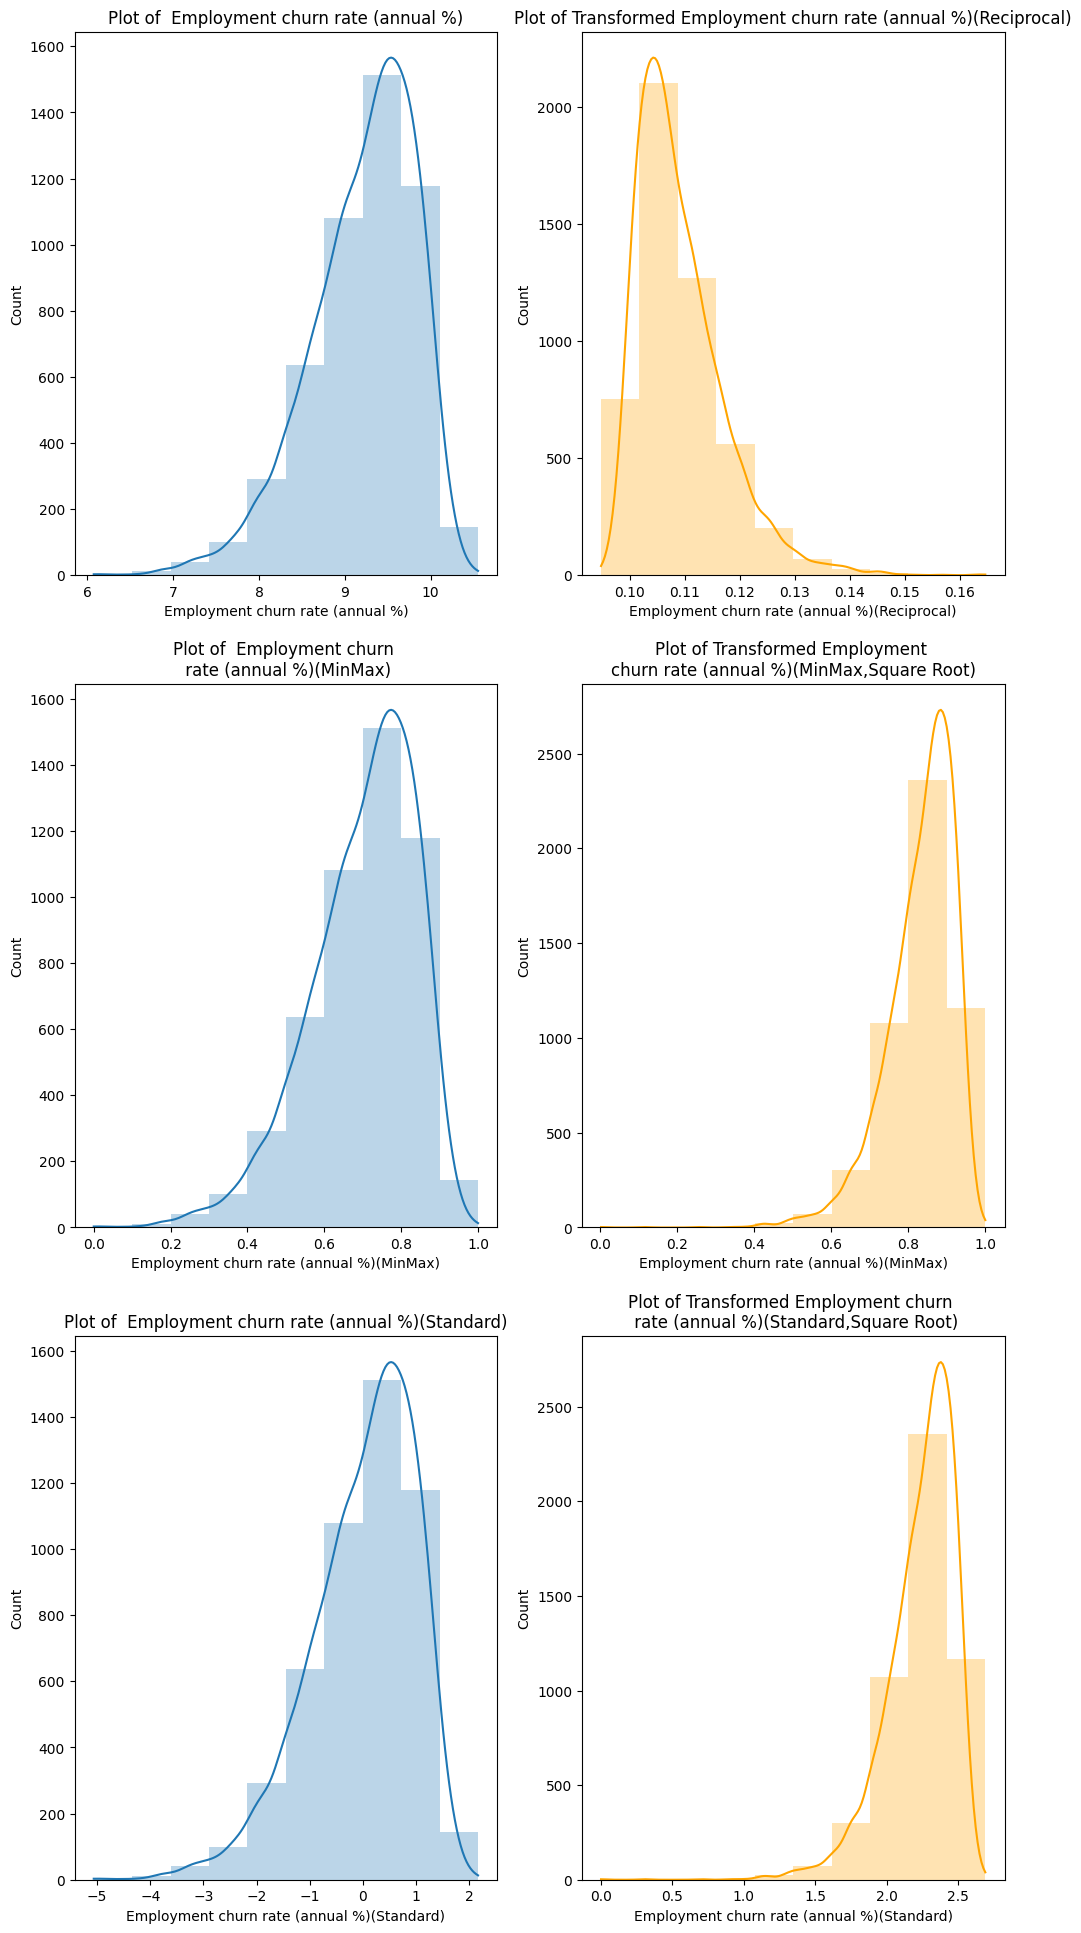

In [84]:
plt.rcParams["figure.figsize"] = (12,24)
fig, axs = plt.subplots(nrows=3, ncols=2)
sns.histplot(data["Employment churn rate (annual %)"],bins=10,kde=True,ax=axs[0,0],alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn rate (annual %)",xlabel="Employment churn rate (annual %)")
sns.histplot(data["recipEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[0,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Employment churn rate (annual %)(Reciprocal)",xlabel="Employment churn rate (annual %)(Reciprocal)")
sns.histplot(data["MinMaxEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[1,0],alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn \n rate (annual %)(MinMax)",xlabel="Employment churn rate (annual %)(MinMax)")
sns.histplot(data["squareRootMinMaxEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[1,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Employment \nchurn rate (annual %)(MinMax,Square Root)",xlabel="Employment churn rate (annual %)(MinMax)")
sns.histplot(data["stdEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[2,0],alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn rate (annual %)(Standard)",xlabel="Employment churn rate (annual %)(Standard)")
sns.histplot(data["squareRootStdEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[2,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Employment churn \n rate (annual %)(Standard,Square Root)",xlabel="Employment churn rate (annual %)(Standard)")

[Text(0.5, 1.0, 'Plot of Transformed Employment churn \n rate (annual %)(Standard,Square Root)'),
 Text(0.5, 0, 'Employment churn rate (annual %)(Standard)')]

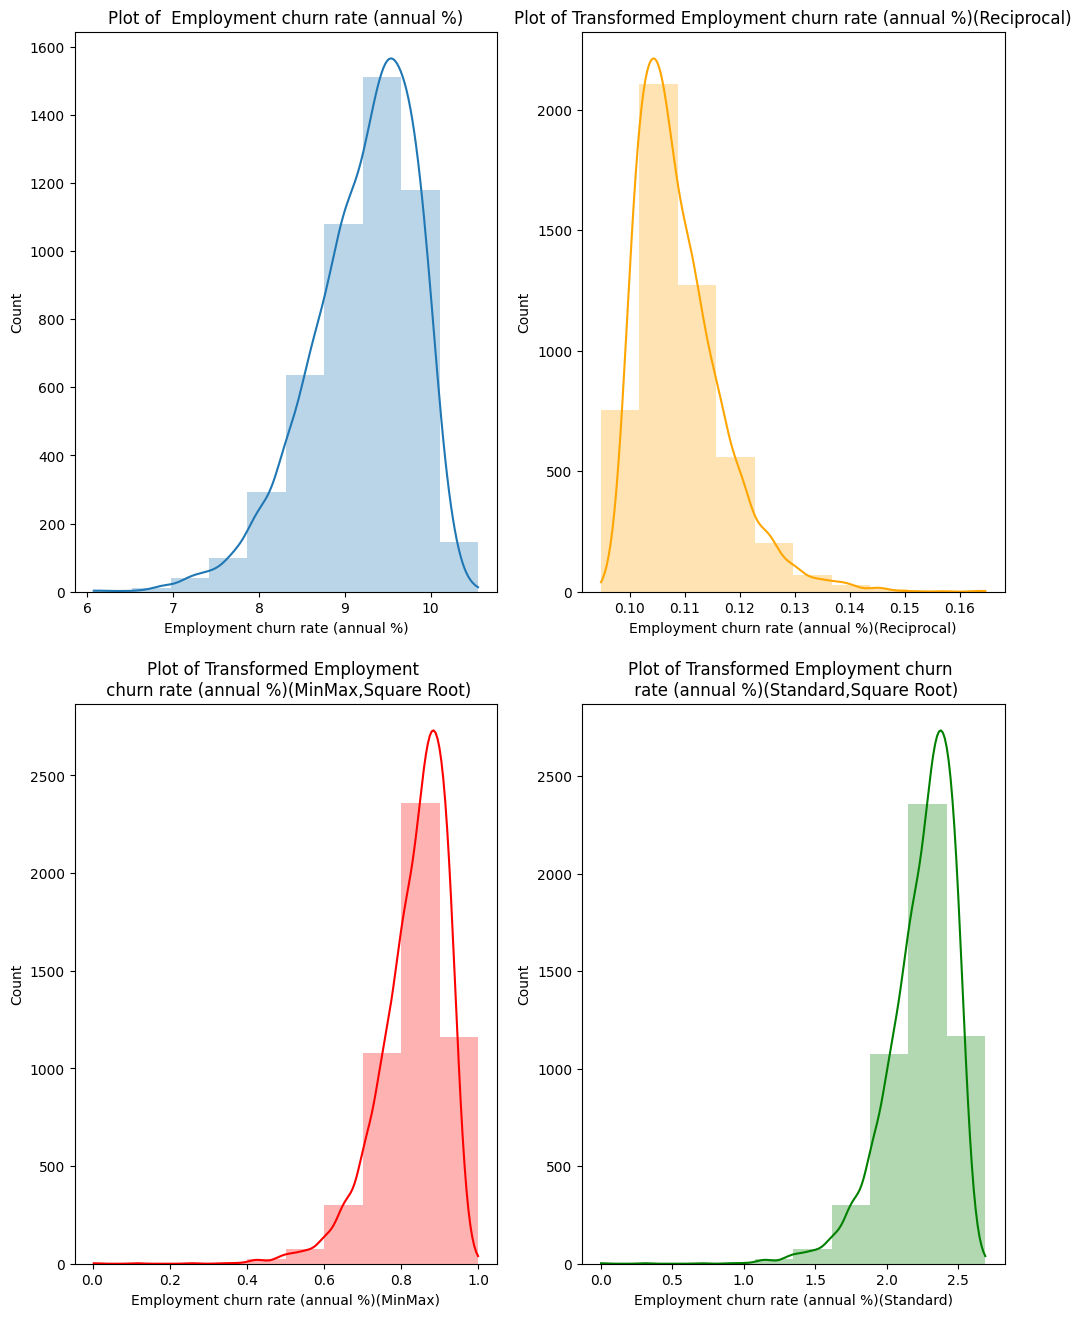

In [85]:
plt.rcParams["figure.figsize"] = (12,16)
fig, axs = plt.subplots(nrows=2, ncols=2)
sns.histplot(data["Employment churn rate (annual %)"],bins=10,kde=True,ax=axs[0,0],alpha=0.3,edgecolor=None).set(title="Plot of  Employment churn rate (annual %)",xlabel="Employment churn rate (annual %)")
sns.histplot(data["recipEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[0,1],color="orange",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Employment churn rate (annual %)(Reciprocal)",xlabel="Employment churn rate (annual %)(Reciprocal)")
sns.histplot(data["squareRootMinMaxEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[1,0],color="red",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Employment \n churn rate (annual %)(MinMax,Square Root)",xlabel="Employment churn rate (annual %)(MinMax)")
sns.histplot(data["squareRootStdEmployment churn rate (annual %)"],bins=10,kde=True,ax=axs[1,1],color="green",alpha=0.3,edgecolor=None).set(title="Plot of Transformed Employment churn \n rate (annual %)(Standard,Square Root)",xlabel="Employment churn rate (annual %)(Standard)")

In [86]:
print("Correlation (RAW): " + str(pearsonr(data["Revenue growth rate (annual %)"], data["Women employment rate (annual %)"])[0]))
print("Correlation (Norm): " + str(pearsonr(data["MinMaxRevenue growth rate (annual %)"], data["MinMaxWomen employment rate (annual %)"])[0]))
print("Correlation (Stan): " + str(pearsonr(data["stdRevenue growth rate (annual %)"], data["stdWomen employment rate (annual %)"])[0]))
print("Square Root Transformation (Norm): " + str(str(pearsonr(data["squareRootMinMaxRevenue growth rate (annual %)"], data["MinMaxWomen employment rate (annual %)"])[0])))
print("Square Root Transformation (Stan): " + str(str(pearsonr(data["squareRootStdRevenue growth rate (annual %)"], data["MinMaxWomen employment rate (annual %)"])[0])))
print("Reciprocal Transformation (RAW): " + str(str(pearsonr(data["recipRevenue growth rate (annual %)"], data["MinMaxWomen employment rate (annual %)"])[0])))

Correlation (RAW): 0.0017548550696125584
Correlation (Norm): 0.0017548550696125636
Correlation (Stan): 0.0017548550696125619
Square Root Transformation (Norm): 0.006976720569127171
Square Root Transformation (Stan): 0.006976071376714183
Reciprocal Transformation (RAW): -0.005446652253386971


In [87]:
print("Correlation (RAW): " + str(spearmanr(data["Revenue growth rate (annual %)"], data["Women employment rate (annual %)"])[0]))
print("Correlation (Norm): " + str(spearmanr(data["MinMaxRevenue growth rate (annual %)"], data["MinMaxWomen employment rate (annual %)"])[0]))
print("Correlation (Stan): " + str(spearmanr(data["stdRevenue growth rate (annual %)"], data["stdWomen employment rate (annual %)"])[0]))
print("Square Root Transformation (Norm): " + str(str(spearmanr(data["squareRootMinMaxRevenue growth rate (annual %)"], data["MinMaxWomen employment rate (annual %)"])[0])))
print("Square Root Transformation (Stan): " + str(str(spearmanr(data["squareRootStdRevenue growth rate (annual %)"], data["MinMaxWomen employment rate (annual %)"])[0])))
print("Reciprocal Transformation (RAW): " + str(str(spearmanr(data["recipRevenue growth rate (annual %)"], data["MinMaxWomen employment rate (annual %)"])[0])))


Correlation (RAW): 0.006076279539051181
Correlation (Norm): 0.006076279539051181
Correlation (Stan): 0.006076279539051181
Square Root Transformation (Norm): 0.006076279539051181
Square Root Transformation (Stan): 0.006076279539051181
Reciprocal Transformation (RAW): -0.006076279539051181
